# Housing Price Prediction Model

This notebook implements and compares two regression models for predicting housing prices:
- Linear Regression
- Random Forest Regressor

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

## Load and Explore Dataset

In [5]:
# Load the dataset
df = pd.read_csv('Housing.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

Dataset shape: (545, 13)

First few rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Rang

In [6]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## Data Preprocessing

### Encode Categorical Variables

In [7]:
# Encode categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']

le = LabelEncoder()
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])

print("\nEncoded dataset:")
print(df_encoded.head())


Encoded dataset:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


## Split Data into Train, Validation, and Test Sets

In [8]:
# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 381
Validation set size: 82
Test set size: 82


## Data Visualization

### Target Variable Distribution

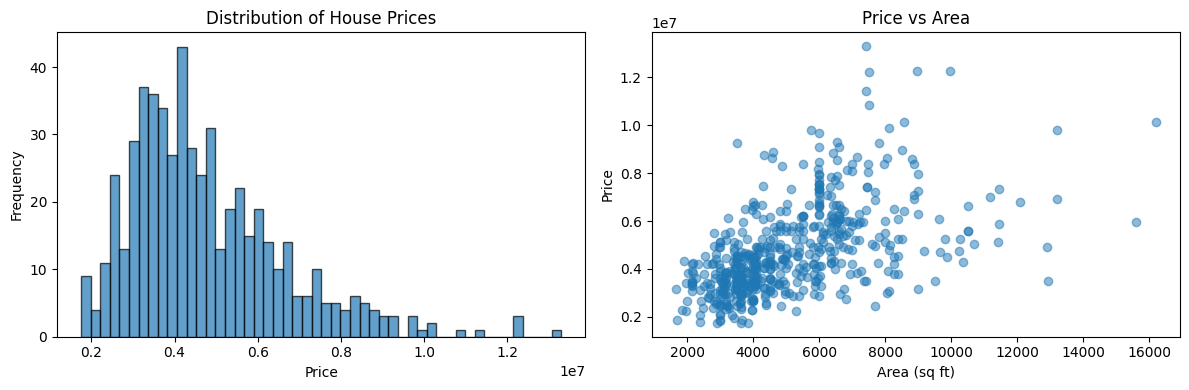

In [9]:
# Visualize the target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

plt.subplot(1, 2, 2)
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Price vs Area')

plt.tight_layout()
plt.show()

### Correlation Heatmap

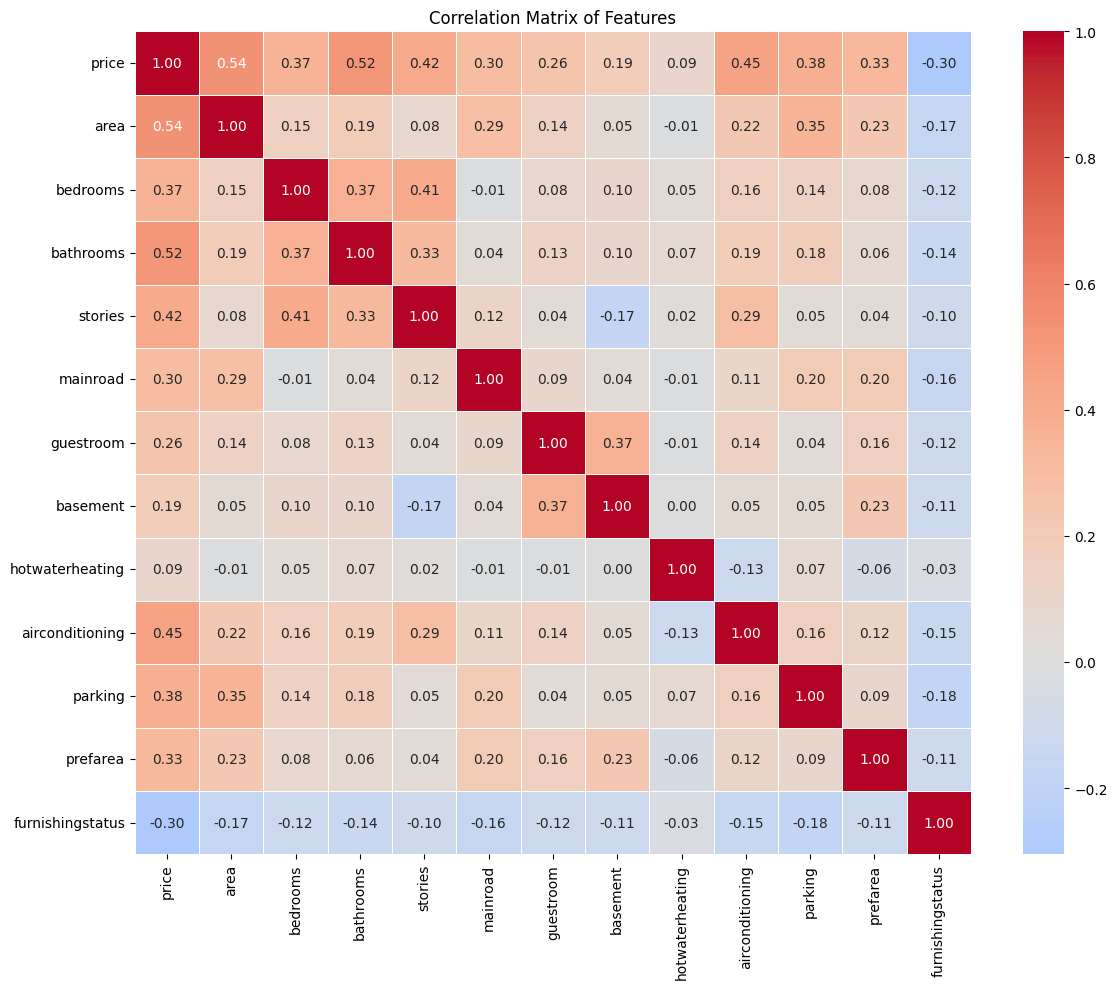

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

## Model Evaluation Function

In [11]:
# Evaluation function
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Results:")
    print(f"MSE: {mse:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAE: {mae:,.2f}")
    print(f"R² Score: {r2:.4f}")
    
    return mse, rmse, mae, r2

## Model 1: Linear Regression

In [12]:
print("\n" + "="*50)
print("LINEAR REGRESSION MODEL")
print("="*50)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_val_pred_lr = lr_model.predict(X_val)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluation
lr_train_metrics = evaluate_model(y_train, y_train_pred_lr, "Training Set")
lr_val_metrics = evaluate_model(y_val, y_val_pred_lr, "Validation Set")
lr_test_metrics = evaluate_model(y_test, y_test_pred_lr, "Test Set")


LINEAR REGRESSION MODEL

Training Set Results:
MSE: 965,153,171,508.67
RMSE: 982,422.09
MAE: 719,440.74
R² Score: 0.6928

Validation Set Results:
MSE: 1,796,419,135,567.31
RMSE: 1,340,305.61
MAE: 1,000,185.05
R² Score: 0.5841

Test Set Results:
MSE: 1,273,676,381,288.79
RMSE: 1,128,572.72
MAE: 850,902.04
R² Score: 0.7033


## Model 2: Random Forest Regressor

In [13]:
print("\n" + "="*50)
print("RANDOM FOREST REGRESSOR MODEL")
print("="*50)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_train_metrics = evaluate_model(y_train, y_train_pred_rf, "Training Set")
rf_val_metrics = evaluate_model(y_val, y_val_pred_rf, "Validation Set")
rf_test_metrics = evaluate_model(y_test, y_test_pred_rf, "Test Set")


RANDOM FOREST REGRESSOR MODEL

Training Set Results:
MSE: 158,869,526,628.97
RMSE: 398,584.40
MAE: 285,109.61
R² Score: 0.9494

Validation Set Results:
MSE: 1,952,314,110,898.59
RMSE: 1,397,252.34
MAE: 971,561.31
R² Score: 0.5480

Test Set Results:
MSE: 1,732,002,947,797.90
RMSE: 1,316,055.83
MAE: 944,272.03
R² Score: 0.5966


## Feature Importance Analysis

In [14]:
# Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             feature  importance
0               area    0.495566
2          bathrooms    0.140123
9            parking    0.067200
11  furnishingstatus    0.051412
3            stories    0.047674
1           bedrooms    0.047437
8    airconditioning    0.047010
6           basement    0.036149
10          prefarea    0.024769
7    hotwaterheating    0.020234
5          guestroom    0.015003
4           mainroad    0.007424


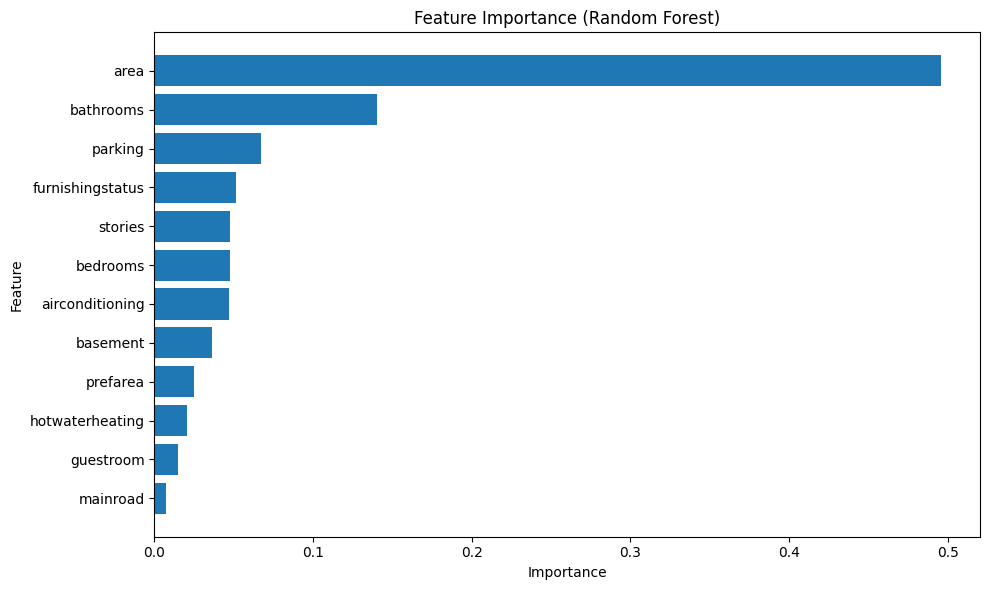

In [15]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Predictions vs Actual Values Visualization

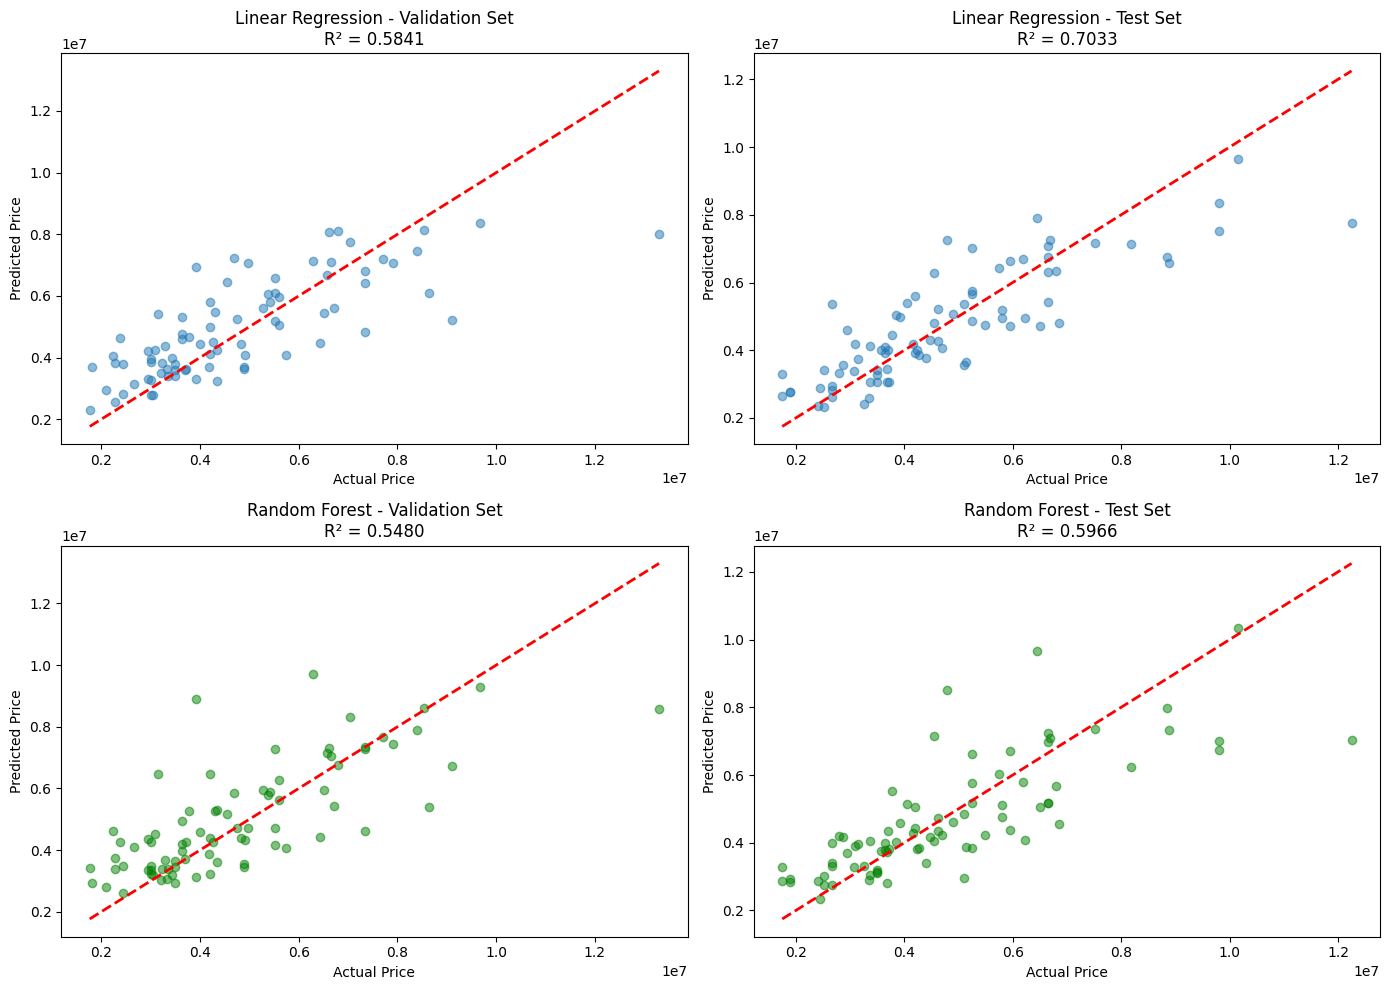

In [16]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Linear Regression - Validation Set
axes[0, 0].scatter(y_val, y_val_pred_lr, alpha=0.5)
axes[0, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
                'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Linear Regression - Validation Set\nR² = {lr_val_metrics[3]:.4f}')

# Linear Regression - Test Set
axes[0, 1].scatter(y_test, y_test_pred_lr, alpha=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title(f'Linear Regression - Test Set\nR² = {lr_test_metrics[3]:.4f}')

# Random Forest - Validation Set
axes[1, 0].scatter(y_val, y_val_pred_rf, alpha=0.5, color='green')
axes[1, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
                'r--', lw=2)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].set_title(f'Random Forest - Validation Set\nR² = {rf_val_metrics[3]:.4f}')

# Random Forest - Test Set
axes[1, 1].scatter(y_test, y_test_pred_rf, alpha=0.5, color='green')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')
axes[1, 1].set_title(f'Random Forest - Test Set\nR² = {rf_test_metrics[3]:.4f}')

plt.tight_layout()
plt.show()

## Residual Analysis

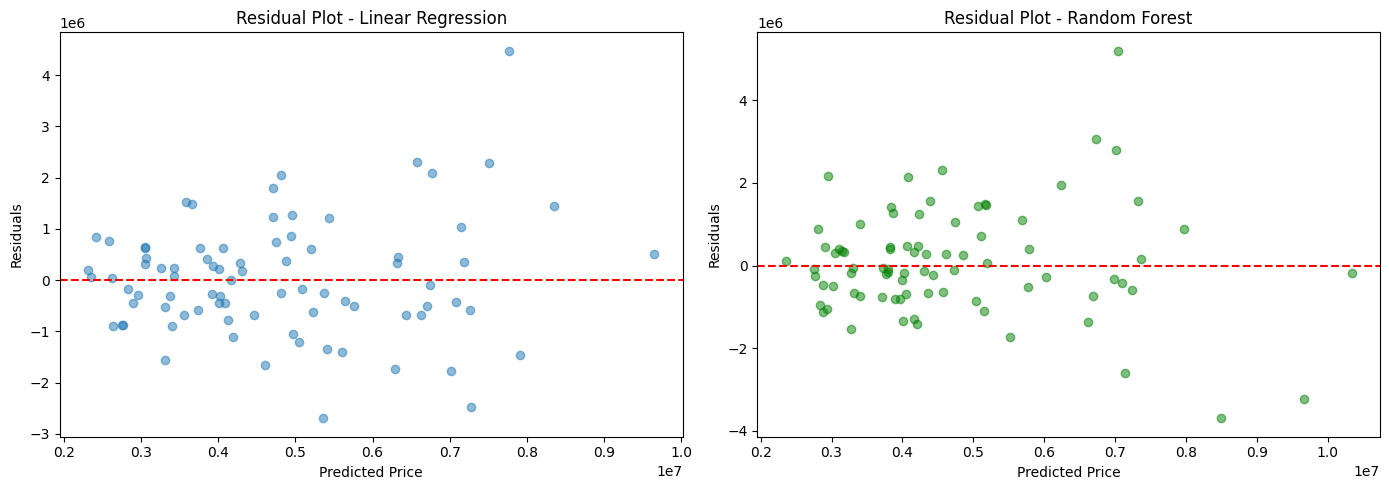

In [17]:
# Residual plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression residuals
residuals_lr = y_test - y_test_pred_lr
axes[0].scatter(y_test_pred_lr, residuals_lr, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Price')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot - Linear Regression')

# Random Forest residuals
residuals_rf = y_test - y_test_pred_rf
axes[1].scatter(y_test_pred_rf, residuals_rf, alpha=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot - Random Forest')

plt.tight_layout()
plt.show()

## Model Comparison

In [18]:
# Model comparison
print("\n" + "="*50)
print("MODEL COMPARISON (Test Set)")
print("="*50)

comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [lr_test_metrics[1], rf_test_metrics[1]],
    'MAE': [lr_test_metrics[2], rf_test_metrics[2]],
    'R² Score': [lr_test_metrics[3], rf_test_metrics[3]]
})

print(comparison)


MODEL COMPARISON (Test Set)
               Model          RMSE            MAE  R² Score
0  Linear Regression  1.128573e+06  850902.042647  0.703315
1      Random Forest  1.316056e+06  944272.031301  0.596554


## Prediction on New Sample

In [19]:
# Predict on a new sample
print("\n" + "="*50)
print("PREDICTION ON NEW SAMPLE")
print("="*50)

new_sample_idx = 0
new_sample = X_test.iloc[new_sample_idx:new_sample_idx+1]
actual_price = y_test.iloc[new_sample_idx]

lr_prediction = lr_model.predict(new_sample)[0]
rf_prediction = rf_model.predict(new_sample)[0]

print(f"\nSample features:")
print(new_sample)
print(f"\nActual Price: {actual_price:,.0f}")
print(f"Linear Regression Prediction: {lr_prediction:,.0f}")
print(f"Random Forest Prediction: {rf_prediction:,.0f}")
print(f"Linear Regression Error: {abs(actual_price - lr_prediction):,.0f}")
print(f"Random Forest Error: {abs(actual_price - rf_prediction):,.0f}")


PREDICTION ON NEW SAMPLE

Sample features:
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
521  3635         2          1        1         0          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
521                0                0        0         0                 2  

Actual Price: 2,408,000
Linear Regression Prediction: 2,346,620
Random Forest Prediction: 2,880,873
Linear Regression Error: 61,380
Random Forest Error: 472,873


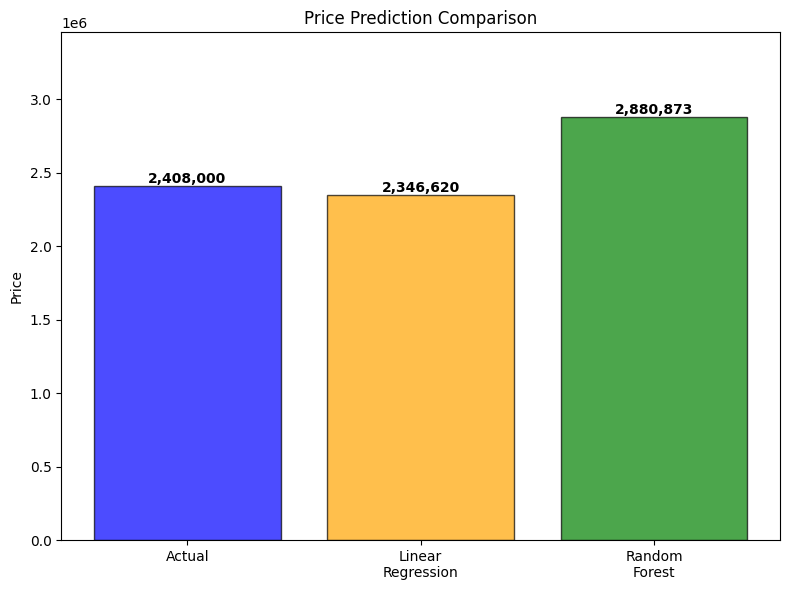

In [20]:
# Visualize comparison
plt.figure(figsize=(8, 6))
models = ['Actual', 'Linear\nRegression', 'Random\nForest']
values = [actual_price, lr_prediction, rf_prediction]
colors = ['blue', 'orange', 'green']

bars = plt.bar(models, values, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Price')
plt.title('Price Prediction Comparison')
plt.ylim([0, max(values) * 1.2])

for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Analysis Complete

In [21]:
print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)


ANALYSIS COMPLETE
